# **Python DA Assignment 2 - Data Visualization**

**1) Loading the Taxis Dataset**

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset("taxis")

# Display first 5 rows
df.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**2) Handling Missing Values**

In [4]:
#check missing values


print(df.isnull().sum())

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [6]:
# Numerical columns – use median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns – use mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2465205533.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2465205533.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [7]:
df.dropna(inplace=True)


In [8]:
print('Missing values find successfully')


Missing values find successfully


**3) Visualizations using Matplotlib/Pandas Plot:**

**Line Chart**

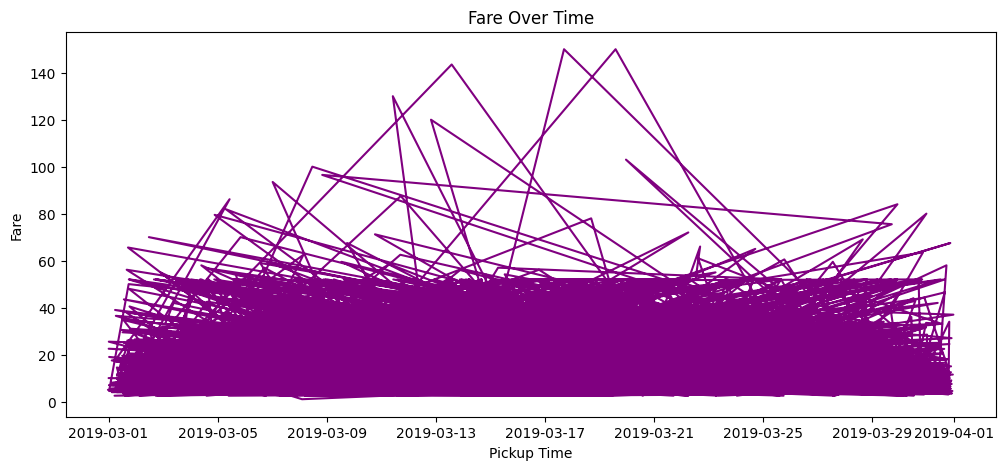

In [9]:
df['pickup'] = pd.to_datetime(df['pickup'])

plt.figure(figsize=(12,5))
plt.plot(df['pickup'], df['fare'], color='purple')
plt.xlabel("Pickup Time")
plt.ylabel("Fare")
plt.title("Fare Over Time")
plt.show()


**Bar Chart**

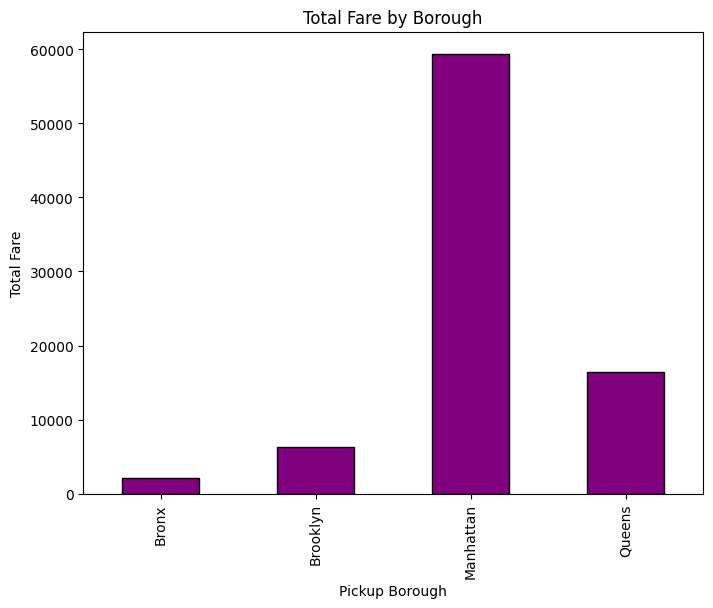

In [10]:
fare_borough = df.groupby("pickup_borough")["fare"].sum()

plt.figure(figsize=(8,5))
fare_borough.plot(kind='bar', color='purple',edgecolor ="black",figsize=(8,6))
plt.xlabel("Pickup Borough")
plt.ylabel("Total Fare")
plt.title("Total Fare by Borough")
plt.show()


**Pie Chart**

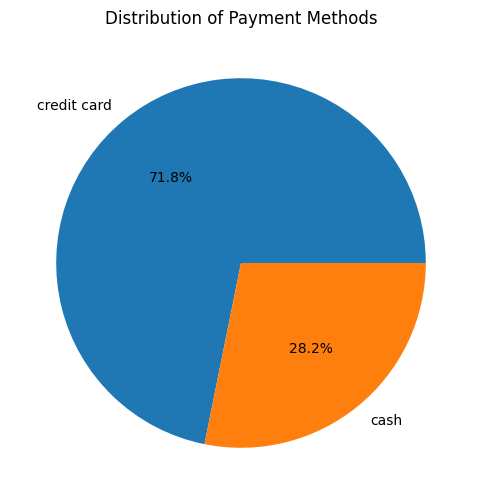

In [11]:
payment_count = df['payment'].value_counts()

plt.figure(figsize=(8,6))
payment_count.plot(kind='pie', autopct="%1.1f%%")
plt.title("Distribution of Payment Methods")
plt.ylabel("")
plt.show()


**Histogram**

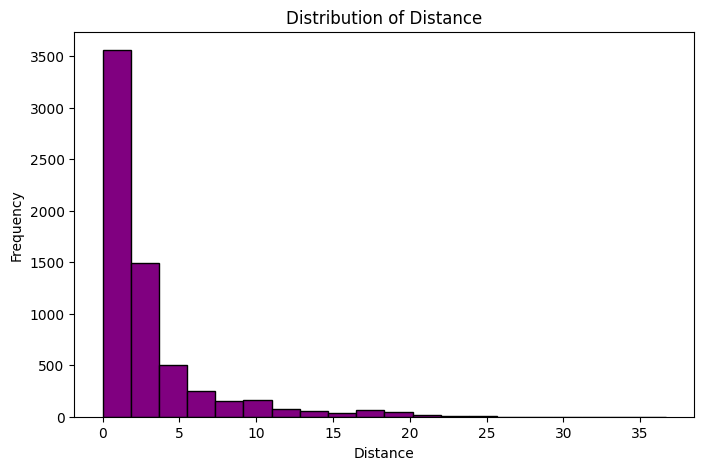

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['distance'], bins=20, color='purple', edgecolor='black')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Distance")
plt.show()


**Box Plot**

<Figure size 800x500 with 0 Axes>

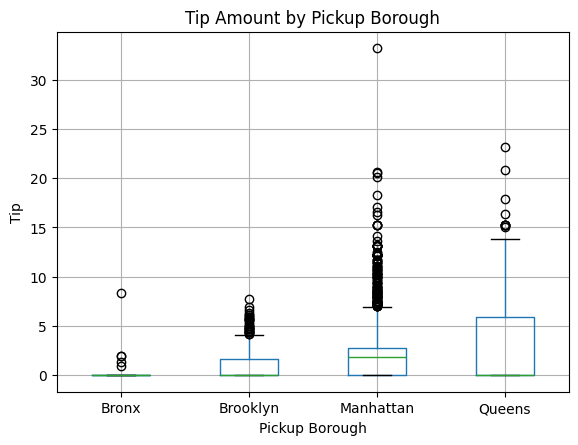

In [14]:
plt.figure(figsize=(8,5))
df.boxplot(column='tip', by='pickup_borough')
plt.title("Tip Amount by Pickup Borough")
plt.suptitle("")
plt.xlabel("Pickup Borough")
plt.ylabel("Tip")
plt.show()


# **Visualizations using Seaborn:**

**Count Plot**

In [15]:
import seaborn as sns


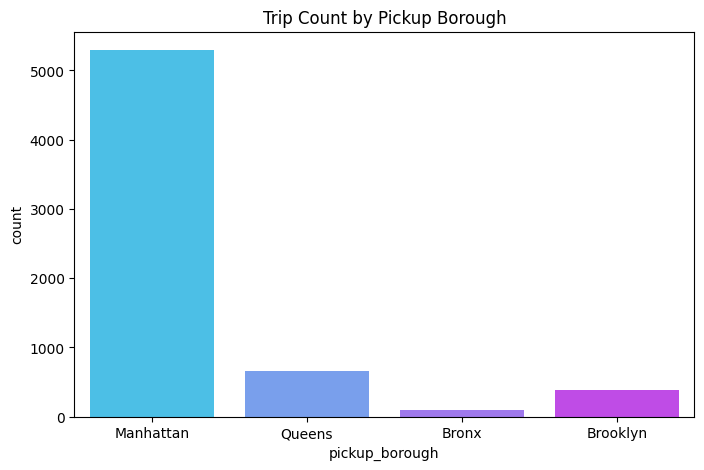

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='pickup_borough',
    hue='pickup_borough',
    palette='cool',
    legend=False
)
plt.title("Trip Count by Pickup Borough")
plt.show()


**Scatter Plot**

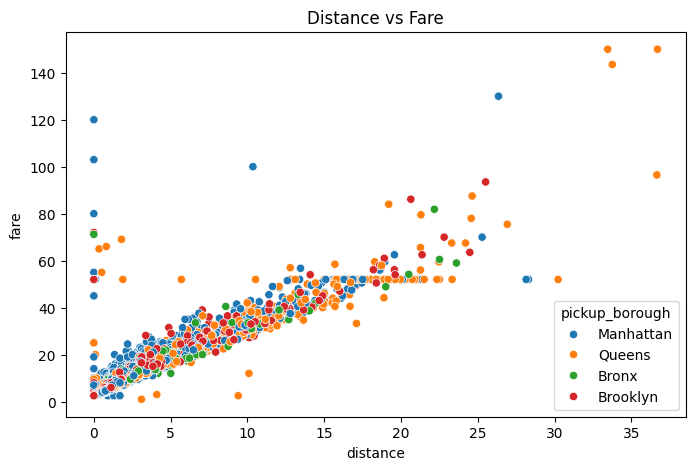

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='distance', y='fare', hue='pickup_borough', color= "teal",)
plt.title("Distance vs Fare")
plt.show()


**Heatmap**

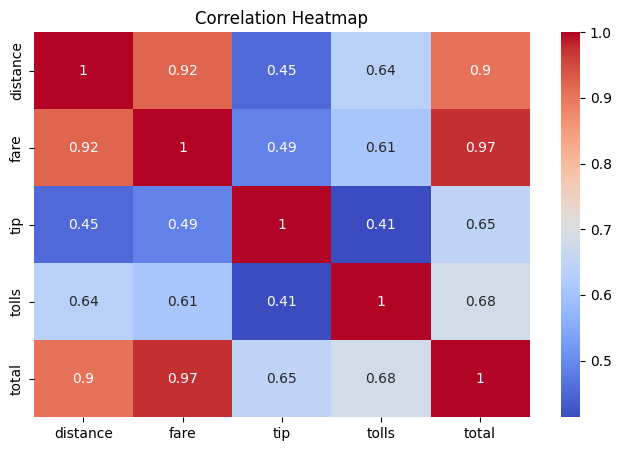

In [20]:
plt.figure(figsize=(8,5))
corr = df[['distance','fare','tip','tolls','total']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Pair Plot**

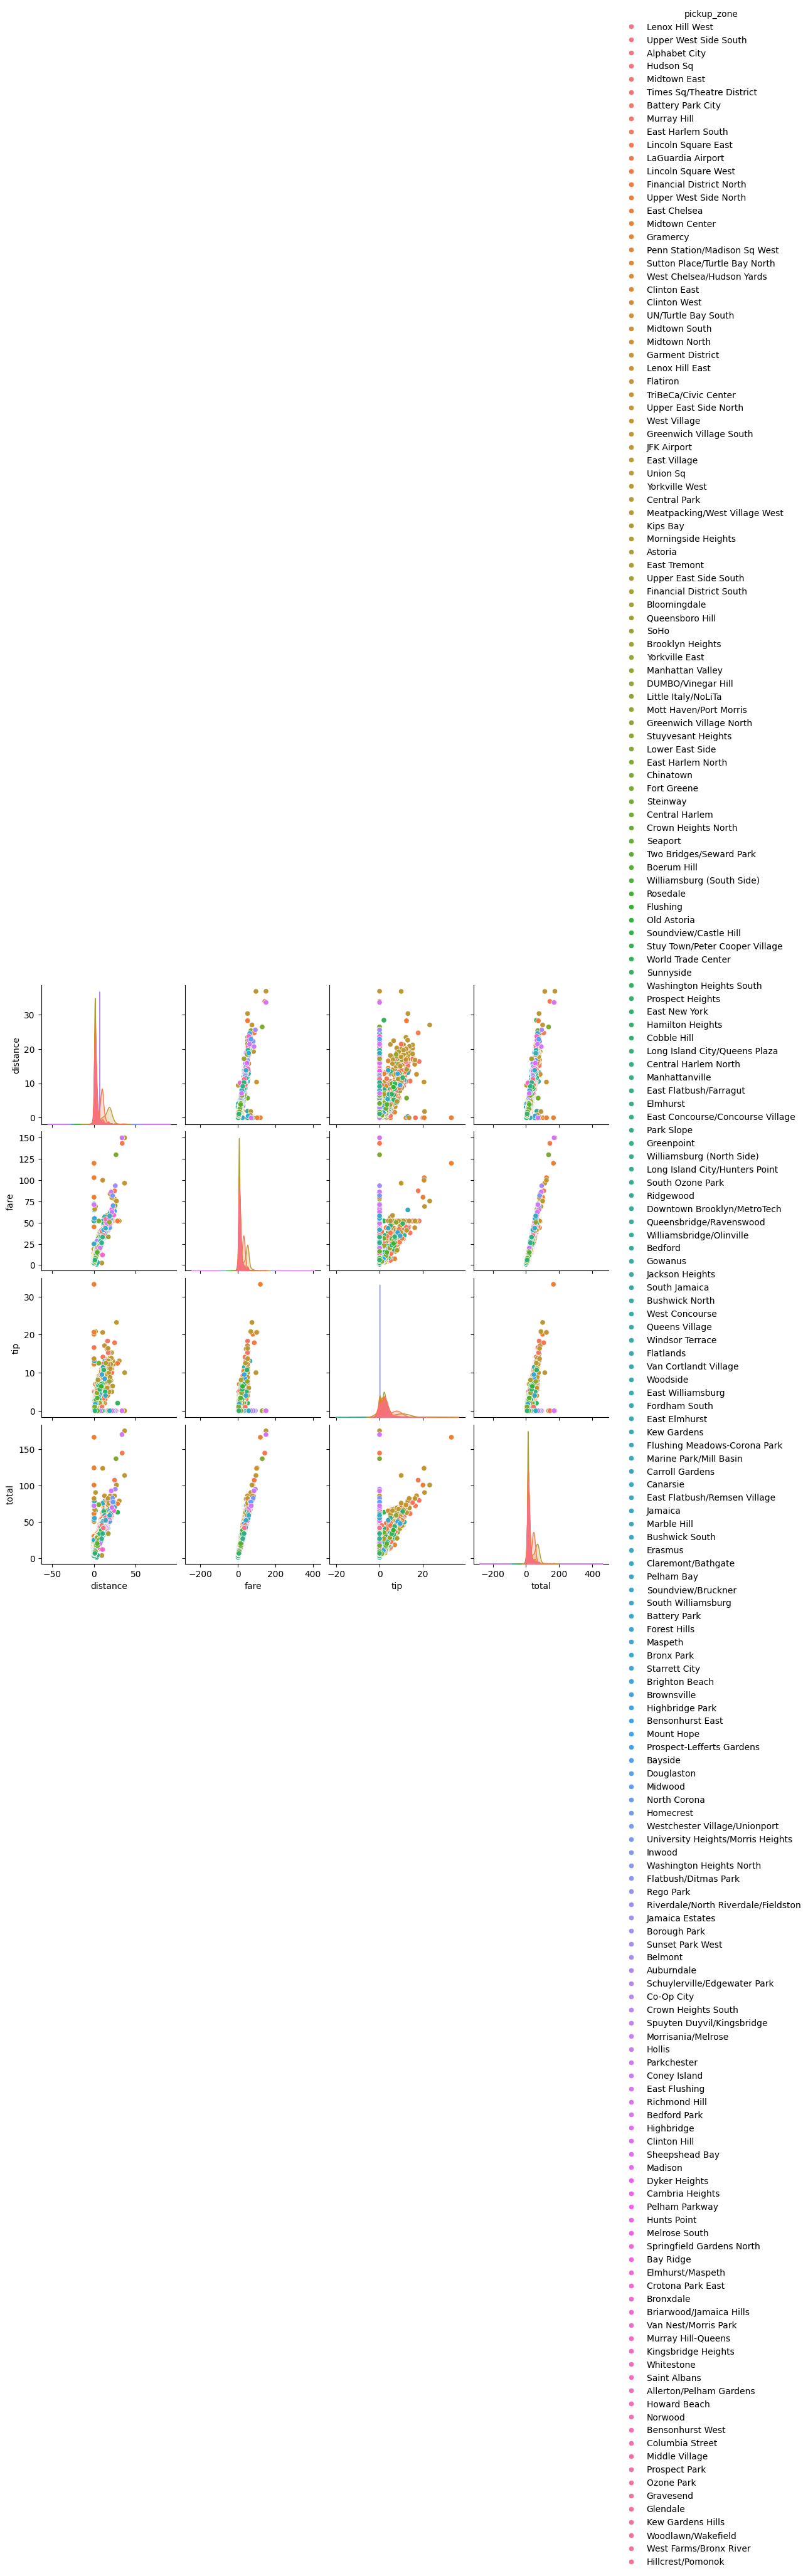

In [21]:
sns.pairplot(df[['distance','fare','tip','total','pickup_zone']],
hue='pickup_zone')
plt.show()


**Violin Plot**

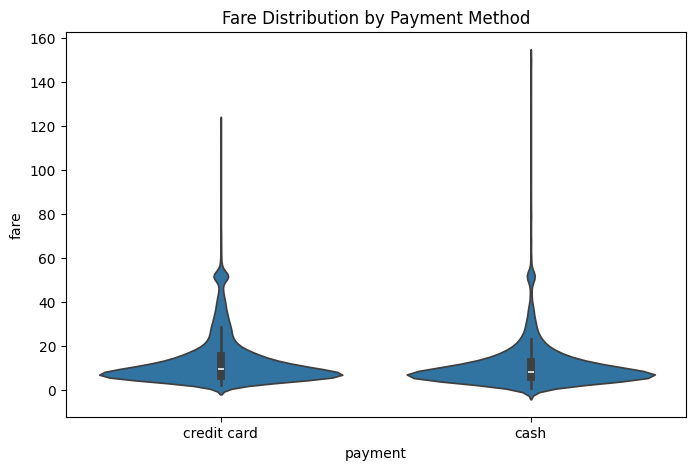

In [24]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='payment', y='fare')
plt.title("Fare Distribution by Payment Method")
plt.show()
